In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(174, 290)


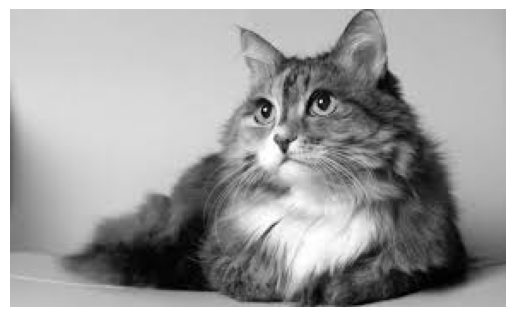

In [26]:
img=cv2.imread(r'C:\Users\diavl\OneDrive\Escritorio\Repositorios\Algoritmos_Bioinspirados\Temas Selectos\P2\Compression\cat.jpeg',2)
rows,cols=img.shape
print(img.shape)
img_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb= np.array(img_rgb, dtype=int)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()
bytes=img_rgb.tobytes()


In [51]:
def numero_a_binario(n):
    if not 0 <= n <= 255:
        raise ValueError("El número debe estar entre 0 y 255")
    binario = bin(n)[2:]  # Convertir a binario y eliminar el prefijo '0b'
    binario=binario.zfill(8)
    return [int(digito) for digito in binario]

In [53]:
decoded_image=np.ndarray((rows,cols*8),np.byte)
for i in range(rows):
    
    for j in range(cols-1):
        #print(img_rgb[i][j])
        aux=numero_a_binario(img_rgb[i][j][1])
        decoded_image[i][j*8:j*8+8]=np.array(aux)#Segmentos de 8 en 8 bits
        


In [57]:
def encrypt(img_bits,T):
    rows,cols=img_bits.shape
    encrypted_img = np.zeros((rows, cols), dtype=int)
    for i in range(rows-1):
        for j in range(T):
            for k in range(1,cols-1):
                #cifrar imagen con regla 90r
                temp=(img_bits[i+1,k-1]+img_bits[i+1,k-1]+img_bits[i,k]%2)
                encrypted_img[i+1,k]=temp
    return encrypted_img

def bin_to_array(bits_arr):
    return np.packbits(bits_arr)


                

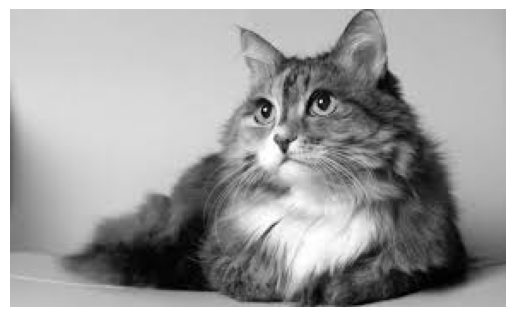

In [60]:
encryted_img=encrypt(decoded_image,20)
plt.imshow(encryted_img)
plt.axis('off')
plt.show()